
## SuperDataScience Podcast NLP Analysis

### Notebook# 4: Text cleaning and preprocessing

<div>
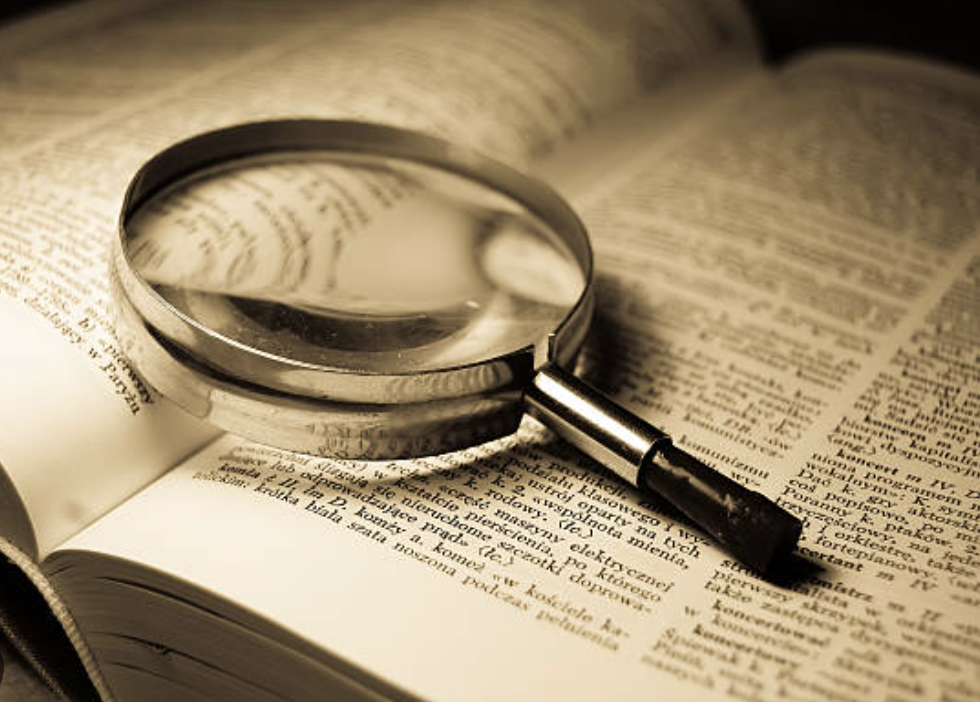
</div>

In [1]:
import pandas as pd
import requests
import warnings

In [2]:
warnings.filterwarnings("ignore", category = FutureWarning)

In [3]:
sds = pd.read_csv('../data/superdatascience.csv')

In [4]:
sds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   episode_name     682 non-null    object
 1   length_episode   682 non-null    object
 2   context_episode  682 non-null    object
 3   guest_name       682 non-null    object
 4   guest_info       682 non-null    object
 5   text_episode     680 non-null    object
dtypes: object(6)
memory usage: 32.1+ KB


In [5]:
sds.head(2)

,episode_name,length_episode,context_episode,guest_name,guest_info,text_episode
0,SDS 381: How to Avoid Failing at Digital Trans...,60 minutes,BusinessData Science,"Podcast Guest: Tony SaldanhaWednesday Jul 08, ...","Subscribe on Website, Apple Podcasts, Spotify,...","Kirill Eremenko:\tThis is episode number 381, ..."
1,SDS 061: Discovering Data Science workflows an...,62 minutes,Machine LearningData SciencePython,Podcast Guest: Daniel WhitenackThursday Jun 15...,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill:\tThis is episode number 61 with data s...


In [6]:
sds[sds["text_episode"].isna()]

,episode_name,length_episode,context_episode,guest_name,guest_info,text_episode
42,SDS 546: Daily Habit #4: Alternate-Nostril Bre...,5 minutes,Data Science,"Podcast Guest: Jon KrohnThursday Feb 03, 2022","Subscribe on Website, Apple Podcasts, Spotify,...",NaN
66,SDS 202: Ideas and Execution,7 minutes,Data Science,"Podcast Guest: Kirill EremenkoFriday Oct 19, 2018","Subscribe on Website, Apple Podcasts, Spotify,...",NaN


In [7]:
sds = sds.dropna(subset=['text_episode'])

In [8]:
# Extracting episode_number and episode_name from episode_name column
sds['episode_number'] = sds['episode_name'].str.split(':', expand = True)[0]
sds['episode_name'] = sds['episode_name'].str.split(':', expand = True)[1]
sds['episode_number'] = sds['episode_number'].str.replace('SDS', '')

# Removing Podcast Guest text from guest_name column
sds['guest_name'] = sds['guest_name'].str.split(':', expand = True)[1]

# Removing minutes from length_episode column
sds['length_episode'] = sds['length_episode'].str.split(' ', expand = True)[0]

# Extracting date from guest_name column and making a new column episode_date
sds['episode_date'] = sds['guest_name'].str.extract(r'(\b[A-Za-z]{3}\s\d{2},\s\d{4}\b)', expand = False).str.strip()

# Converting episode_date into datetime object and changing format of date
sds['episode_date'] = pd.to_datetime(sds['episode_date'], format='%b %d, %Y' )

# Extracting year of episode
sds['episode_year'] = sds['episode_date'].dt.year
#sds['episode_year'] = sds['episode_date'].str.split(',', expand = True)[1]

# Replacing/removing date in guest_name column 
sds['guest_name'] = sds['guest_name'].str.replace(r'(\b[A-Za-z]{3}\s\d{2},\s\d{4}\b)', '')

# Extracting day from guest_name column and making a new column episode_day
sds['episode_day'] = sds['guest_name'].str.extract(r'(Monday|Tuesday|Wednesday|Thursday|Friday|Saturday|Sunday)', expand = False).str.strip()

#Replacing/removing day in guest_name column 
sds['guest_name'] = sds['guest_name'].str.replace('Monday|Tuesday|Wednesday|Thursday|Friday|Saturday|Sunday', '')

#Adding spaces between some words in context_episode column
sds['context_episode'] = sds['context_episode'].str.replace('([a-z])([A-Z])', r'\1 \2')

# changing the data types for episode_number and length_episode
sds['episode_number'] = sds['episode_number'].astype('int')
sds['length_episode'] = sds['length_episode'].astype('int')

In [9]:
# Sorting dataframe on episode number
sds = sds.sort_values('episode_number').reset_index(drop = True)

In [10]:
# Add a new column host_episode to sds dataframe
sds['host_episode'] = 'Kirill Eremenko'  # Set initial value to 'Kirril Eremenko '

# Set value to 'Jon Krohn' from column 430 to 681
sds.loc[430:681, 'host_episode'] = 'Jon Krohn'

In [11]:
sds.to_csv('../data/sds_cleaned.csv', index = False)

### Making separate dataframe for non datascience episodes

In [12]:
# List of non-datascience episodes
topics = [' SEOI PEI – The skin of water listen now',' “What are you passionate about?”', ' Sweat every day',
          ' Pride and humility',' Compartmentalization', ' Get out there!',' Failure', ' Happiness and problem solving',
          ' Get in touch',' Secret to success', ' What is reality?',' Push yourself',' Teamwork', ' Getting things done', ' Selective ignorance',' Date with destiny', 
          ' Conferences',' Maker’s schedule vs. Manager’s schedule',  ' Dreams vs. Goals',' My best tool',
          ' The best ideas', ' Stimulate your creativity',' The Quant Crunch',  ' Connecting the dots',' The five balls of life',  ' Do it for yourself',
          ' Breaking patterns', ' Your questions', ' Why i became Vegetarian', ' Computer vision', ' Fermi questions',' Do what you want',  ' Exponential Thinking',  ' The power of now',' Willpower', 
          ' 100 Episodes',' Board Games',' Working Remotely',' AlphaGo Zero',  ' How to Win Friends & Influence People',' Expand Your Comfort Zone',
          ' The Power of Gratitude', ' 1-on-1 with Kirill', ' New Year Resolutions',' Technological Singularity', 
          ' Who Moved My Cheese?',' Reckless Commitment', ' Ender’s Game', ' Instant Gratification Monkey',
          ' How do Lobsters Grow?', ' Learn Blockchain!', ' Zone of Genius', ' Upper Limiting', ' Coworking',
          ' Two Things to Remember and Two Things to Forget',' Empathy and Compassion', ' The Trolley Problem',
          ' Have a Mentor',  ' Why Socializing is Vital', " Parkinson's Law to increase Productivity",
          ' Maximize Life with the Rapid Planning Method',' Up Your Presentation Skills with Toastmasters',
          ' What I Learned from a 10 Day Detox',' Love Languages and How They Impact Your Life',
          ' Should You Be Effective or Efficient?',' Focus on Your Strengths and Ignore Your Weaknesses',
          ' Tips for a Bumpy Ride', ' Why You Need to Go Beyond the Data',' A Technology Detox Challenge',
          ' The Amazing Idea Behind Essentialism',  ' Why You Need Domain Knowledge in Data Science',
          ' Why Execution Trumps Knowledge',' 6 Ways to Fill the Data Science Gap', 
          ' See You in San Diego',' Ace the “Greatest Weakness” Interview Question',' Why I Became Vegan', ' Two Millimeter Shifts',
          ' What’s the Future of Data Science? Speaker Mashup Edition',' Ideas and Execution', 
          ' Set Your Goals Higher',' Re-live DSGO2018',' Compete With Yourself', ' What Is Amazing In Your Life', 
          ' Start A Great Day', ' 2018 in Numbers', ' Hacks for reading more books',
          ' Flat Tyres Happen', ' Sleep on it', ' How to Deal with Negative Emotions', ' Meditation',
          ' Guilt vs Shame', ' Two Wolves', ' Eating S.L.O.W.L.Y.',' You Cannot Make Progress Without a Routine',
          ' Exploration vs Exploitation', ' The Cold is My Master',' The Six Months Rule',  ' Legacy', 
          ' Pura Vida',  ' Your Tribe', ' Make It About Yourself', ' Amazing',' Who Inspires You?', 
          ' Look for the Horse',' Good!',' Go through the Motions',' No Coaching', ' Better Than Perfect',
          ' Too Many Photos', ' My Top 5 Productivity Hacks',' Coronavirus', ' Negative Coefficients', 
          ' Racism and Discrimination',' Importance of Sleep', ' Define Your Own Success',
          ' Future-Proof Your Career', ' Remember to Wind Down',' Expose Yourself to New Ideas Regularly',
          ' Use Your Unconscious Mind', ' Get a Headhunter', ' Perception vs. Emotion',' Start Your Own Morning Ritual', 
          ' Teach It', ' Five Job Hunting Tips', ' Emotional Burnout', ' Think Bigger',' Face Your Demons', 
          ' The Narrative Arc in Storytelling',' Abandon Hope', ' Meaning is Everything',' Communicate Your Needs', 
          ' Needs vs. Wants',' My Advice for Career Success',' Play With Feeling',' Wheel of Life', ' Pain vs. Suffering', ' The Shift',
          ' The Internal Conflict Model', ' Intellect and Intelligence',' One-on-one with Kirill',
          ' Hello from Jon and Welcome to 2021',' Attention Sharpening Tools Part 1',
          ' Attention Sharpening Tools Part 2',' The Staggering Pace of Progress', ' The Pomodoro Technique',
          ' Behind the Scenes', ' The History of Algebra',' It Could Be Even Better', 
          ' My Favorite Books',' The Learning Never Stops (so Relax)',' Peer-Driven Learning', ' Five Keys to Success', 
          ' Top Five Resume Tips',' The Continuous Calendar',' The History of Calculus',' The Price of Your Attention',
          ' The World is Awful (and it’s Never Been Better)',' How to Instantly Appreciate Being Alive',
          ' 2040',' How Only Beginners Know Everything',' Managing Imposter Syndrome', ' Building Your Ant Hill',
          ' Does Caffeine Hurt Productivity? (Part 1)',' Does Caffeine Hurt Productivity? (Part 2',
          ' Does Caffeine Hurt Productivity? (Part 3', ' Fail More',' The Normal Anxiety of Content Creation',
          ' Mutable vs Immutable Conditions', ' A Holiday Greeting',' What I Learned in 2021', 
          ' Daily Habit #1',' Daily Habit #2',' Continuous Calendar for 2022', ' Daily Habit #3',
          ' Daily Habit #4',' Daily Habit #5', ' Daily Habit #6',' The Most Popular SuperDataScience Episodes of 2021',
          ' Daily Habit #7',' The Best Time to Plant a Tree',' Daily Habit #9', ' Music for Deep Work', 
          ' Tech Startup Dramas',' Daily Habit #10',' We Are Living in Ancient Times', ' Ignition',
          ' Four Thousand Weeks',' Who Dares Wins',' More Guests on Fridays',' What I Learned in 2022',
          ' The Most Popular SuperDataScience Podcast Episodes of 2022',
          ' Career choice, disruptions in finance and application stacks',' How Constant Learning Created a Jet-Set Career',
          ' Tips to Improve your Memory', ' How to be Happy and Successful',' Boost Your Self-Confidence',
          ' Ask the Right Question', ' Your Core Strength', ' Learning Something New',' Solitude Deprivation',
          ' Love Yourself',' The Passion Paradox', ' Who You Become',' Trial by Fire', ' Contemplation',
          ' Meet the Team',' Mentorship',' Diets',' Proximity is Power #2',' Many Ways to Fail & Five Ways to Succeed in Startups',
          ' The Power of Coaching',' Emotions, Relationships, and Being Kind During the Pandemic',
          ' Depression and Suicidal Thoughts',' The Power of Women in STEM', ' Maelstrom, Chaos, and Mayhem',
          ' 10 Tips to Become a Master Presenter', ' Stand More - Sit Less', ' Real-World Applications of Digital Twins',
          ' The End of Jobs',' Yoga Nidra', ' Open-Access Publishing',' Yoga Nidra Practice with Steve Fazzari',
          ' Daily Habit #11',' Thriving on Information Overload',' The Four Requirements for Expertise (beyond the “10,000 Hours”)',
          ' The Joy of Atelic Activities',' Burnout']


In [13]:
len(topics)

227

In [14]:
# function to create dataframe with non datascience episodes
def subset_by_episode_name(df, episode_names):
    return df[df['episode_name'].isin(episode_names)]

In [15]:
non_datascience = subset_by_episode_name(sds, topics).reset_index(drop = True)

In [16]:
non_datascience['class'] = ''
non_datascience['class'] = non_datascience['class'].replace('', 'Health, Life and Philosophy')

In [17]:
non_datascience.to_csv('../data/non_datascience.csv', index = False)

## Creating data science episode dataframe

In [18]:
# Function to leave datascience episodes in sds dataframe
def remove_by_episode_name(df, episode_names):
    return df[~df['episode_name'].isin(episode_names)]

In [19]:
sds_datascience = remove_by_episode_name(sds, topics).reset_index(drop = True)

### Dividing episodes into proper categories/ recategorizing episodes

In [20]:
sds_datascience['context_episode'].nunique()

91

In [21]:
# Duplicating context_episode column
sds_datascience['class'] = sds_datascience['context_episode']

In [22]:
Data_Visualization = ['Data Science Database Data Visualization',
                      'Tableau Data Visualization',
                      'Business Data Visualization',
                      'Data Science Data Visualization',
                      'Data Science Tableau Excel Data Visualization',
                      'Data Science Tableau Data Visualization',
                      'Tableau Database Data Visualization',
                      'Business Data Science Tableau Data Visualization',
                      'Business Tableau Data Visualization',
                      'Data Science Excel Data Visualization',
                      'Business Data Science Data Visualization']

sds_datascience['class'] = sds_datascience['class'].replace(Data_Visualization, 'Data Visualization')

In [23]:
Programming = ['Excel', 
               'Python',
               'Business Data Science Excel',
               'R Programming Data Science Python',
               'Business R Programming',
               'R Programming Python', 
               'Business R Programming Data Science',
               'R Programming Database', 
               'Data Science Python',
               'R Programming Data Science',
               'R Programming Data Science Excel']

sds_datascience['class'] = sds_datascience['class'].replace(Programming, 'Programming')

In [24]:
Programming_Data_Visualization = ['Business R Programming Tableau Data Visualization',
                             'R Programming Data Science Data Visualization',
                             'R Programming Tableau Database Data Visualization',
                             'Business R Programming Data Science Python Database Data Visualization']

sds_datascience['class'] = sds_datascience['class'].replace(Programming_Data_Visualization, 'Programming and Data Visualization')

In [25]:
Database = ['Business Data Science Database', 
            'Data Science Python Database',
            'Business Python Database',
            'Database',
            'Business Database', 
            'Data Science Database']

sds_datascience['class'] = sds_datascience['class'].replace(Database, 'Database')

In [26]:
Machine_Learning = ['Machine Learning Data Science',
                     'Machine Learning R Programming Data Science',
                     'Machine Learning', 
                     'Business Machine Learning R Programming Data Science Python Excel',
                     'Machine Learning R Programming Data Science Excel Database',
                     'Business Machine Learning Python Database',
                     'Machine Learning Data Science Python',
                     'Business Machine Learning Data Science Python',
                     'Business Machine Learning Tableau Data Visualization',
                     'Business Machine Learning Data Science', 
                     'Machine Learning Data Science Database',
                     'Business Machine Learning', 
                     'Machine Learning Python Database',
                     'Machine Learning Data Visualization',
                     'Machine Learning Data Science Productivity',
                     'Business Machine Learning R Programming Data Science']

sds_datascience['class'] = sds_datascience['class'].replace(Machine_Learning, 'Machine Learning')

In [27]:
Machine_Learning_AI = ['Business Machine Learning Data Science Artificial Intelligence',
                        'Machine Learning Data Science Artificial Intelligence Blockchain',
                        'Business Machine Learning Data Science Artificial Intelligence Database',
                        'Machine Learning Data Science Artificial Intelligence']

sds_datascience['class'] = sds_datascience['class'].replace(Machine_Learning_AI, 'Machine Learning and Artificial Intelligence')

In [28]:
AI = ['Artificial Intelligence', 
        'Business Artificial Intelligence',
        'Business Data Science Artificial Intelligence',
        'Business Artificial Intelligence Database',
        'Data Science Artificial Intelligence']

sds_datascience['class'] = sds_datascience['class'].replace(AI, 'Artificial Intelligence')

In [29]:
Machine_Learning_Deep_Learning = ['Machine Learning Data Science Python Deep Learning',
                                    'Business Machine Learning Data Science Deep Learning',
                                    'Machine Learning Data Science Deep Learning',
                                    'Business Machine Learning R Programming Data Science Python Deep Learning',
                                    'Machine Learning Data Science Database Deep Learning',
                                    'Data Science Deep Learning']

sds_datascience['class'] = sds_datascience['class'].replace(Machine_Learning_Deep_Learning, 'Machine Learning and Deep Learning')

In [30]:
Machine_Learning_AI_Deep_Learning = ['Business Machine Learning Data Science Python Artificial Intelligence Deep Learning',
                 'Business Machine Learning Data Science Artificial Intelligence Deep Learning',
                 'Machine Learning Data Science Python Artificial Intelligence Database Deep Learning',
                 'Machine Learning Data Science Artificial Intelligence Deep Learning',
                 'Machine Learning Data Science Artificial Intelligence Database Blockchain Deep Learning',
                 'Business Machine Learning R Programming Data Science Artificial Intelligence Deep Learning',
                 'Machine Learning Artificial Intelligence Blockchain Deep Learning',
                 'Machine Learning Data Science Artificial Intelligence Blockchain Deep Learning',
                 'Machine Learning Artificial Intelligence Deep Learning']

sds_datascience['class'] = sds_datascience['class'].replace(Machine_Learning_AI_Deep_Learning, 'Machine Learning, Artificial Intelligence and Deep Learning')

In [31]:
AI_Deep_Learning = ['Data Science Artificial Intelligence Deep Learning',
                       'Business Data Science Artificial Intelligence Deep Learning']

sds_datascience['class'] = sds_datascience['class'].replace(AI_Deep_Learning, 'Artificial Intelligence and Deep Learning')

In [32]:
Data_Science = ['Business Data Science', 
                  'Data Science', 
                  'Uncategorized',
                  'Business', 
                  'Data Science Statistics', 
                ' Data Science in Retail',
                  'Life Philosophy Data Science']

sds_datascience['class'] = sds_datascience['class'].replace(Data_Science, 'Data Science')

In [33]:
Blockchain = ['Data Science Blockchain',
              'Database Blockchain',
              'Blockchain']

sds_datascience['class'] = sds_datascience['class'].replace(Blockchain, 'Blockchain')

In [34]:
Data_Science_Productivity = ['Data Science Python Productivity',
                            'Data Science Productivity']

sds_datascience['class'] = sds_datascience['class'].replace(Data_Science_Productivity, 'Data Science and Productivity')

In [35]:
Deep_Learning = ['Data Science Deep Learning', 
                 'Business Data Science Deep Learning']

sds_datascience['class'] = sds_datascience['class'].replace(Deep_Learning, 'Deep Learning')

In [36]:
career = ['Data Science Career Tips',
          'Business Data Science Career Tips',
          'Data Science Python Career Tips',
          'Business Data Science Artificial Intelligence Career Tips',
          'Machine Learning Data Science Career Tips']
sds_datascience['class'] = sds_datascience['class'].replace(career, 'Data Science Career')

In [37]:
sds_datascience.to_csv('../data/sds_datascience.csv', index = False)

In [38]:
# Function to dialouges of host and guest for each episode and store in separate rows
def find_pattern(row):
    episode_split_text = []
    speaker = []
    episode_no = str(row['episode_number'])
    guest_name = str(row['guest_name'].strip())
    host_episode = str(row['host_episode'].strip())
    text = str(row['text_episode'])

    # Different patterns of guest name and host name present in text
    guest_first_name_1 = guest_name.split()[0]
    guest_first_name_2 = guest_name.split()[1] if len(guest_name.split()) > 1 else '' # if any credentials are present in fron of name like Dr.
    host_first_name = host_episode.split()[0]
    guest_last_name = guest_name.strip().split()[-1]
    guest_first_middle_name = ' '.join(guest_name.split()[:2])
    guest_middle_last_name = ' '.join(guest_name.split()[1:3])
    guest_first_last_name = " ".join([guest_first_name_1, guest_last_name])
    first_guest_name = ' '.join(guest_name.split()[:2])
    second_guest_first_name = guest_name.strip().split()[-2] if len(guest_name.split()) > 1 else ''
    second_guest_full_name = " ".join([second_guest_first_name, guest_last_name]) if second_guest_first_name else ''
   
    # Conditions to look in text
    pattern = f"{guest_name}:|{host_episode}:|{guest_first_name_1}:|{guest_first_name_2}:|{host_first_name}:|{guest_last_name}:|{guest_first_middle_name}:|{guest_middle_last_name}:|{guest_first_last_name}:|{first_guest_name}:|{second_guest_full_name}:"
    
    # Find all occurrences of the pattern and their corresponding positions
    pattern_matches = re.finditer(pattern, text)
    
    prev_end = 0
    for match in pattern_matches:
        start = match.start()
        end = match.end()
        
        # Add the text between the previous and current pattern occurrence to the split_text list
        episode_split_text.append(text[prev_end:start].strip())
        
        prev_end = end
        
        # Add the speaker information for the previous split text
        speaker.append(text[start:end-1].strip())
    
    # Add the remaining text after the last pattern occurrence to the split_text list
    episode_split_text.append(text[prev_end:].strip())
    
    # Add the speaker information for the remaining split text
    speaker.append('')
    
    # Shift the index of the speaker list by 1
    speaker = [''] + speaker[:-1]

    # Create a DataFrame from the split text and speaker
    text_df = pd.DataFrame({'episode_number': episode_no, 'episode_split_text': episode_split_text, 'speaker': speaker})
    
    return text_df


# Loop to process each row of sds_datascience dataframe
sds_ds_split = pd.DataFrame(columns=['episode_number', 'episode_split_text', 'speaker'])
for i, row in sds_datascience.iterrows():
    split_text = find_pattern(row)
    sds_ds_split = sds_ds_split.append(split_text, ignore_index = False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
sds_ds_split['episode_split_text'].apply(lambda x: isinstance(x, str) and len(x.strip()) == 0).value_counts()

False    49449
True       359
Name: episode_split_text, dtype: int64

In [40]:
sds_ds_text = sds_ds_split[sds_ds_split['episode_split_text'] != '']

In [41]:
sds_ds_text['episode_number'] = sds_ds_text['episode_number'].astype('int')

/var/folders/s3/9_r9v9px7_v0q69b5zcbnmsm0000gn/T/ipykernel_19139/4240092265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sds_ds_text['episode_number'] = sds_ds_text['episode_number'].astype('int')


In [42]:
sds_ds_text = pd.merge(sds_datascience, sds_ds_text, on = 'episode_number')

In [43]:
# Text Cleaning
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace('\\t|\\n|\\xa0', '')
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace('\(?\d{2}:\d{2}\):| ?(\d{2}:)+\d{2}', '')
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace('\(background music plays\)', '')
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace('\(background music\)', '')
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace('\[inaudible\]', '')
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace('\(inaudible\)', '')
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("That\\'s", ' That is')
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("it\\'s", "it is")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("They\\'re", " They are")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("they\\'re", "they are")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("that\\'s", "that is")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("you\\'re", "you are")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("You\\'re", " You are")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("I\\'m", " I am")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("here\\'s", "here is")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("You\'re", "You are")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("you\'re", "you are")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("we\'re", "we are")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("I\'ve", "I have")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("I\'ll", "I will")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("He\'s", "He is")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("he\'s", "he is")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("what\'s", "what is")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("here\\'s", "here is")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("there\\'s", "there is")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("isn\\'t", "is not")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("didn\\'t", "did not")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("Yeah, yeah, yeah, yeah", " Yes")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("Yeah", " Yes")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("yeah", "yes")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("don\\'t", "do not")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("’", "'")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("haven\'t", "have not")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("doesn\'t", "does not")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("we\'ve", "we have")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("we\'d", "we had")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("It\'s", " It is")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("can\'t", "cannot")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("who\'s", "whose")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("wouldn\'t", "would not")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("there\'re", "there are")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("There\'re", " There are")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("it\'s", "it is")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("What\'s", " What is")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("Right, right, right", "Right")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("you\'ll", "you will")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("there\'ll", "there will")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("let\'s", "let us")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("Yes, yes, yes", "yes")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("would\'ve", "would have")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("AI", "artificial intelligence")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("what\\'ll", "what will")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("won\'t", "would not")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("shouldn\'t", "should not")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("\[crosstalk\]", "")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("A.I.", "artificial intelligence")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("Five-Minute", "Five Minute")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("SuperDataScience", "")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("I\'d", "I had")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("They\'ve", "They Have")
sds_ds_text['episode_split_text'] = sds_ds_text['episode_split_text'].str.replace("I\'m", "I am")

In [44]:
sds_ds_text.to_csv('../data/sds_ds_text.csv', index = False)

### Processing non datascience episode dataframe

In [ ]:
# Loop to process each row of non_datascience dataframe
sds_nds_split = pd.DataFrame(columns=['episode_number', 'episode_split_text', 'speaker'])
for i, row in non_datascience.iterrows():
    split_text = find_pattern(row)
    sds_nds_split = sds_nds_split.append(split_text, ignore_index = False)

In [ ]:
sds_nds_split['episode_split_text'].apply(lambda x: isinstance(x, str) and len(x.strip()) == 0).value_counts()

In [ ]:
sds_nds_split['episode_number'].value_counts()

In [ ]:
sds_nds_text = sds_nds_split[sds_nds_split['episode_split_text'] != '']

In [ ]:
sds_nds_text['episode_number'] = sds_nds_text['episode_number'].astype('int')

In [ ]:
sds_nds_text = pd.merge(non_datascience, sds_nds_text, on = 'episode_number')

In [ ]:
sds_nds_text['episode_split_text'] = sds_nds_text['episode_split_text'].str.replace('\\t|\\n|\\xa0', '')
sds_nds_text['episode_split_text'] = sds_nds_text['episode_split_text'].str.replace('\(?\d{2}:\d{2}\):| ?(\d{2}:)+\d{2}', '')
sds_nds_text['episode_split_text'] = sds_nds_text['episode_split_text'].str.replace('\(background music plays\)', '')

In [ ]:
sds_nds_text.to_csv('../data/sds_nds_text.csv', index = False)

### function used before to split columns

In [ ]:
# Function to split the text over the rows

def text_split(df, column):
    
    sds_index = column.str.findall('(?:^|\\xa0|(?:\\n)+)([A-Za-z\s]+):').explode().to_frame()
    sds_index['episode_index'] = 1 
    sds_index['episode_index'] = sds_index.groupby(sds_index.index)['episode_index'].cumsum()
    sds_index = sds_index.reset_index().set_index(['index','episode_index']).rename(columns = {column.name :'speaker'})
    #sds_index
    split_text = column.str.split('(?:^|\\xa0|(?:\\n)+)[A-Za-z\s]+:', expand = True).stack().to_frame()#.droplevel(-1)
    
    split_text.index = split_text.index.rename(sds_index.index.names)
    #return sds_index,split_text 
    sds_index = sds_index.merge(split_text, left_index = True, right_index=True, how = 'right').droplevel(-1)
    return df.merge(sds_index,left_index=True, right_index=True)


In [ ]:
# call function text_split
sds_text = text_split(sds, sds['text_episode'])

In [ ]:
sds_text = sds_text.rename(columns = {0 : 'episode_split_text' })